In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

%matplotlib inline

In [42]:

cav = pd.read_csv("../youtube/data/CAvideos.csv")
cav['category_id'] = cav['category_id'].astype(str)
category_id = {}

with open('../youtube/data/CA_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']
cav.insert(4, 'category', cav['category_id'].map(category_id))

cav.head()

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


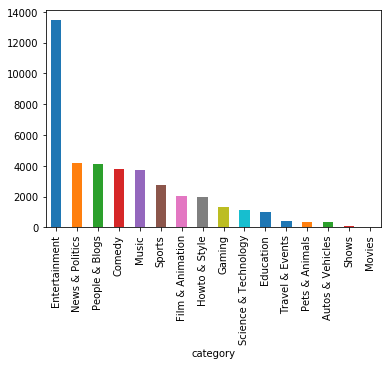

In [84]:
labels = cav['category'].unique()
trends  = cav.groupby(['category']).count()['title']
trends = trends.sort_values(ascending=False)
# fig, ax = plt.subplots(figsize=(10,10))
trends
trends.plot(kind='bar')
# trends.hist(bins=len(labels))
# trends.hist()
# explode = (0, 0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0 ,0, 0) 
# ax.pie(trends, labels=labels, autopct='%1.2f%%',explode = explode,
#         shadow=False, startangle=180)
# ax.axis('equal')

In [11]:
cav.loc[:, 'views': 'comment_count'].describe()

,views,likes,dislikes,comment_count
count,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [21]:
cav.loc[:, 'views': 'comment_count'].corr()

,views,likes,dislikes,comment_count
views,1.000000,0.828964,0.557621,0.693107
likes,0.828964,1.000000,0.460427,0.836585
dislikes,0.557621,0.460427,1.000000,0.643494
comment_count,0.693107,0.836585,0.643494,1.000000


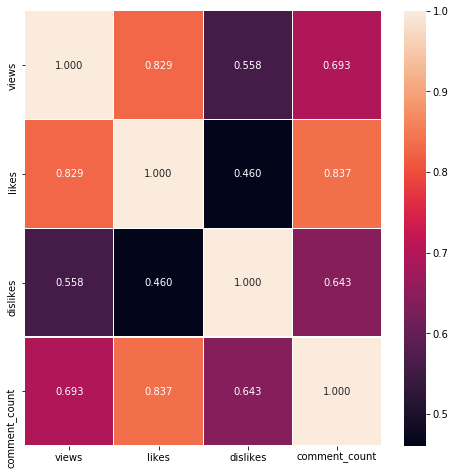

In [22]:

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cav.loc[:, 'views': 'comment_count'].corr(), annot=True, linewidths=.2, fmt= '.3f',ax=ax)
plt.show()

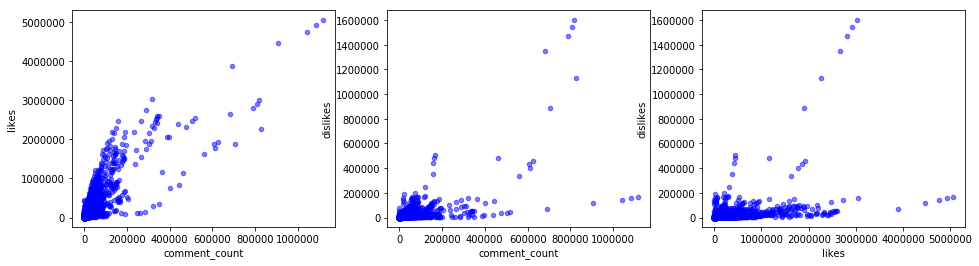

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
cav.plot(kind='scatter', x='comment_count', y='likes', ax=axes[0], alpha=0.5, color='blue')
cav.plot(kind='scatter', x='comment_count', y='dislikes', ax=axes[1], alpha=0.5, color='blue')
cav.plot(kind='scatter', x='likes', y='dislikes', ax=axes[2], alpha=0.5, color='blue')